실습에 해당하는 내용은 책 "혼자 공부하는 머신러닝+딥러닝"을 참고해서 작성했습니다.

# Decision Tree

In [ ]:
# 로지스틱 회귀로 와인 분류하기
# class(타깃값)가 0 이면 레드 와인, 1이면 화이트 와인
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
# pandas dataframe을 Numpy로 바꾸고 훈련세트와 테스트세트로 나누기
# 처음 3개 열을 numpy 배열로 바꿔 data에 저장하고 마지막 class 열을 numpy 배열로 바꿔 target에 저장
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
# 훈련세트와 테스트세트로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42) #train set과 test set의 비율이 8 : 2

In [ ]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
# 표준화 전처리 (이상치 완화, 변수 간의 단위 차이를 보정하기 위해서 실행)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 로지스틱 회귀 모델 훈련 (정확도가 낮음)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [ ]:
print(lr.coef_, lr.intercept_) #기울기와 절편

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [ ]:
# 보다 설명하기 쉬운 모델인 Decision Tree
# Test set 점수가 낮은 오버피팅된 모델

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target)) #0.99로, overfitting 되어 있다는 것을 확인할 수 있음
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


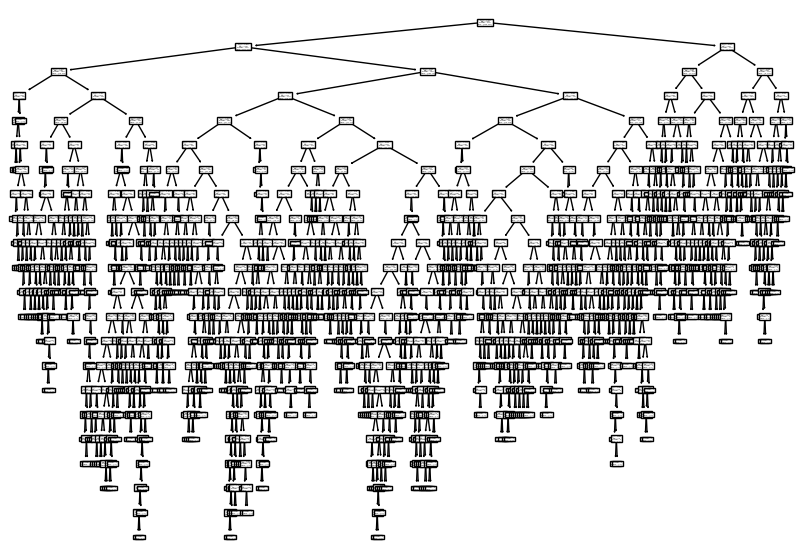

In [ ]:
# plot_tree()로 그림으로 출력

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

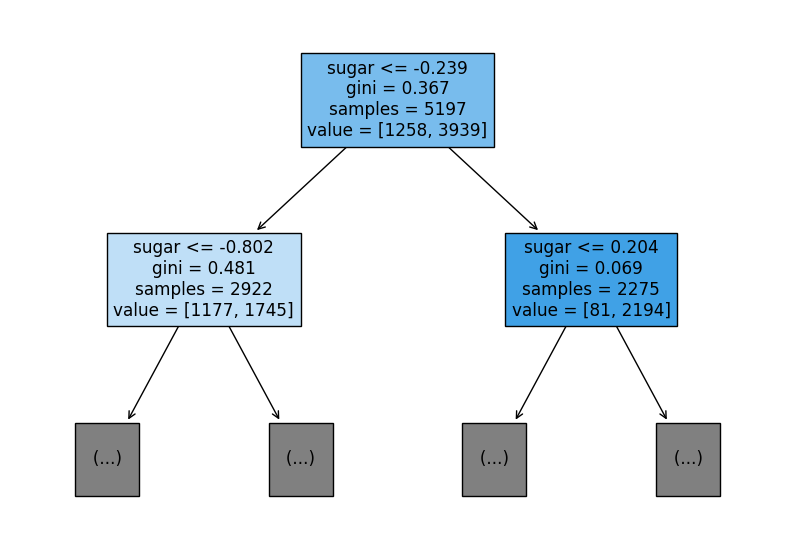

In [ ]:
# 트리의 깊이를 제한해서 출력
# max_depth 매개변수를 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장하여 그림
# feature_names 매개변수에 특성의 이름을 전달

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH']) #왼쪽이 YES, 오른쪽이 NO
plt.show() #gini: 불순도 (최적의 결과를 찾기 위함)

In [ ]:
# 가지치기(Purining): 자라날 수 있는 트리의 최대 깊이를 지정 (max_depth 변수를 이용)

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target)) #training set의 정확도가 낮아져서 overfittin을 방지함
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


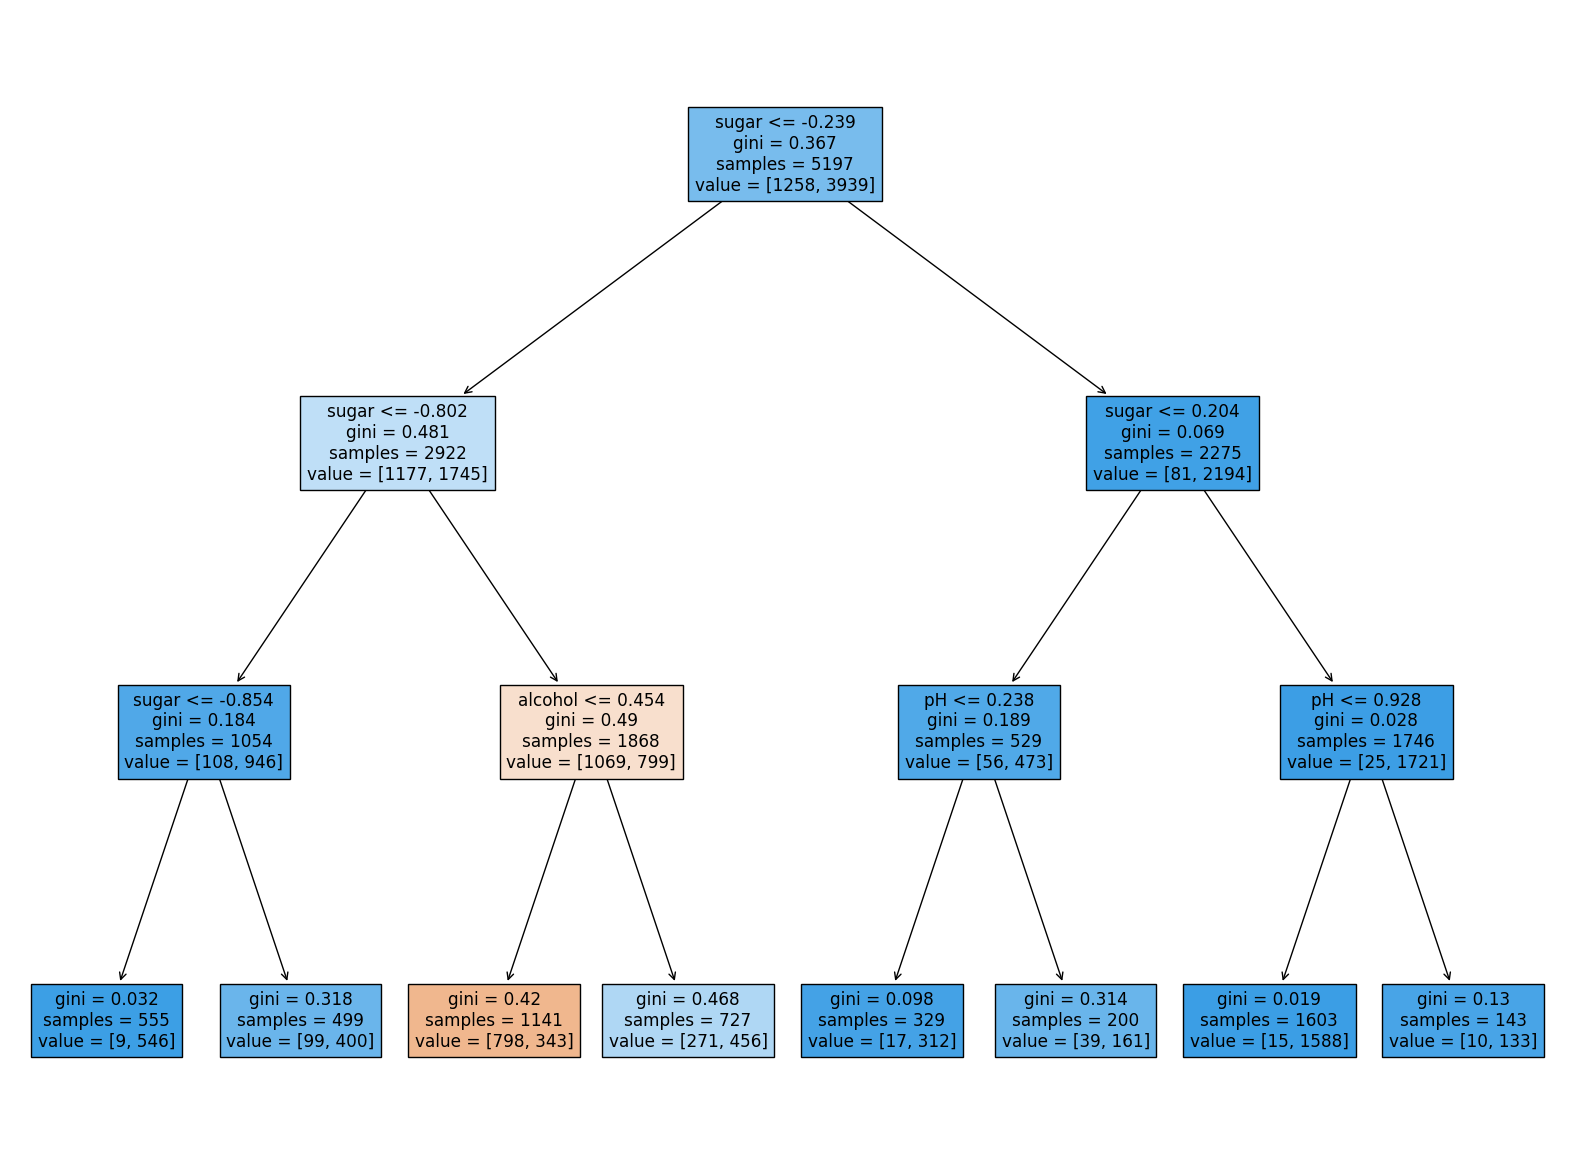

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


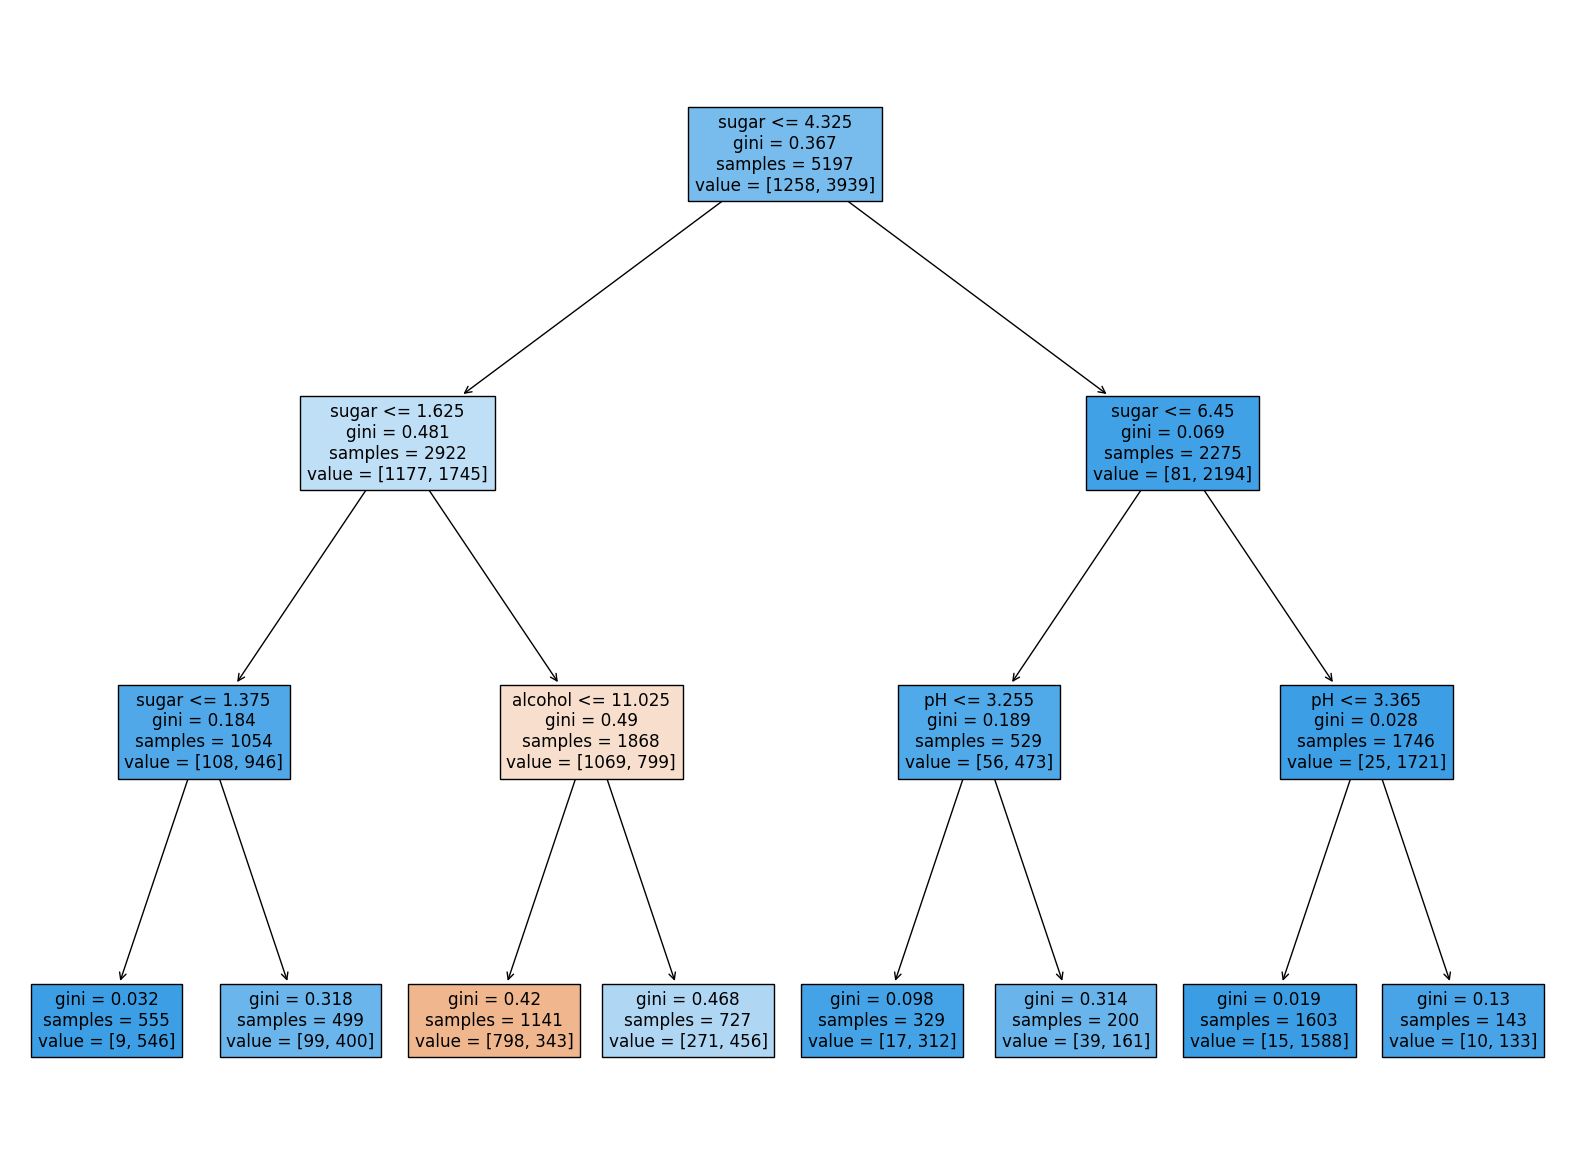

In [ ]:
# 당도가 1.625 이하인 와인 중 알콜 도수가 11.025 이하인 것이 레드 와인

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names = ['alcohol','sugar','pH'])
plt.show()

In [ ]:
# 특성 중요도: Decision Tree에 사용된 특성이 불순도를 감소하는데 기여한 정도를 나타내는 값 (sugar > alcohol > pH)
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


# Cross Validation & Grid Search

In [ ]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [ ]:
# train_input과 train_target을 다시 train_test_split()함수에 넣어 훈련세트 sub_input, sub_target과 검증세트 val_input, val_target을 만듦
# train_input의 약 20%를 val_input으로 만듦
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [ ]:
# Cross validation(교차 검증): 검증 세트를 떼어 내어 평가하는 과정을 여러번 반복하고 이 점수를 평균내어 최종 검증 점수를 얻음
# 평가할 모델 객체를 첫번째 매개변수로 전달하고 훈련세트 전체를 함수에 전달함
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00614214, 0.01114058, 0.0063889 , 0.00621676, 0.00602341]), 'score_time': array([0.00148392, 0.00075531, 0.00071836, 0.00077033, 0.0007422 ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [ ]:
# 교차 검증의 최종 점수는 test_score 키에 담긴 5개의 점수를 평균하여 얻을 수 있음
import numpy as np

print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
# 교차 검증을 할 때 훈련 세트를 섞으려면 splitter(분할기)를 지정해야 함
# 주로 회귀모델은 KFold 분할기, 분류모델은 StratifiedKFold 사용
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
# 훈련 세트를 섞은 후 10-폴드 교차 검증 수행하는 방법
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


In [ ]:
# GridSearchCV 클래스는 하이퍼파라미터 탐색과 교차 검증을 한번에 수행함(그리드 서치: 조합의 수가 제한적일 때, 정확한 탐색이 필요할 때, 하이퍼파라미터 공간이 작을 때 사용하면 좋음)
# Decision Tree 모델에서 min_impurity_decrease 매개변수의 최적값 찾기
# 탐색할 매개변수와 탐색할 값의 리스트를 딕셔너리로 만듦, 0.0001부터 0.0005까지 0.0001씩 증가하는 5개의 값 시도
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [ ]:
# 탐색 대상 모델과 params 변수를 전달하여 그리드 서치 객체를 만듦
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [ ]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [ ]:
# 그리드 서치는 훈련이 끝나면 검증 점수가 가장 높은 모델의 매개변수 조합으로 전체 훈련 세트에서 자동으로 다시 모델을 훈련함
# 이 모델은 gs 객체의 best_estimator_ 속성에 저장되어 있음
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [ ]:
# 그리드 서치로 찾은 최적의 매개변수를 best_params_ 속성에 저장되어 있음
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [ ]:
# 각 매개변수에서 수행한 교차 검증의 평균 점수는 cv_reults_ 속성의 mean_test_score 키에 저장되어 있음
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [ ]:
# argmax() 함수를 사용해 가장 큰 값의 인덱스 추출
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [ ]:
# np.arange()함수는 첫번째 매개 변수 값에서 시작해 두번째 매개변수에 도달할 때까지 세번째 매개변수를 계속 더한 배열을 만듦, 두번째 매개변수는 포함 x
# range()도 비슷하지만 정수만 사용 가능
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


In [ ]:
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

0.8615384615384616


In [ ]:
# 랜덤 서치: 매개변수 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링 할 수 있는 확률분포 객체를 전달

from scipy.stats import uniform, randint

In [ ]:
# 0에서 10사이 범위를 갖는 randint 객체를 만들고 10개의 숫자 샘플링
rgen = randint(0,10)
rgen.rvs(10)

array([4, 4, 7, 7, 8, 3, 4, 8, 8, 3])

In [ ]:
# 1000개로 샘플링 숫자를 늘려 각 숫자의 개수 세어보기
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([107, 105, 107,  94,  99, 118,  91,  90,  87, 102]))

In [ ]:
# randint는 정숫값, uniform은 실숫값을 뽑음
ugen = uniform(0,1)
ugen.rvs(10)

array([0.25366876, 0.78792903, 0.26762618, 0.76499087, 0.28069611,
       0.54237191, 0.65992498, 0.33054095, 0.18966908, 0.60376795])

In [ ]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20,50),
          'min_samples_split': randint(2,25),
          'min_samples_leaf': randint(1,25),
          }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a10072f0ca0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a10072cde70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a10072f0f10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a10072f1bd0>},
                   random_state=42)

In [ ]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [ ]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86


# Ensemble

In [ ]:
# 랜덤 포레스트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
# return_train_score=True로 하여 훈련 세트에 대한 점수도 같이 반환(과대적합 파악에 용이)
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [ ]:
# 특성 중요도 출력
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [ ]:
# 자체적으로 모델을 평가하는 oob 점수 출력
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


In [ ]:
# 엑스트라 트리
# 랜덤포레스트와 유사하나 부트스트랩 샘플을 사용하지 않고 각 결정 트리를 만들 때 전체 훈련 세트를 사용함
# 노드를 분할할 때 가장 좋은 분할을 찾는 것이 아니라 무작위로 뿐할함
# 특성을 무작위로 분할한다면 성능이 낮아이지만 많은 트리를 앙상블 하기에 오버피팅을 막고 검증 세트의 점수를 높이는 효과가 있음
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [ ]:
# 특성 중요도 출력
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [ ]:
# 그레디언트 부스팅
# 깊이가 얕은 결정트리를 사용하기에 오버피팅에 강하고 높은 일반화 성능
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [ ]:
# 학습률을 증가시키고 트리의 개수를 늘리면 성능이 향상됨
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [ ]:
# 특성 중요도 출력
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


In [ ]:
# 그레디언트 부스팅의 속도와 성능을 개선한 히스토그램 기반 그레디언트 부스팅
# 입력 특성을 256개의 구간으로 나누어 노드를 분할할 때 최적의 분할을 빠르게 찾음
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [ ]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [ ]:
# 특성 중요도 출력
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [ ]:
hgb.score(test_input, test_target)

0.8723076923076923

In [ ]:
# XGBoost
# tree_method 매개변수를 'hist'로 지정하여 히스토그램 기반 그레디언트 부스팅 가용
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9555033709953124 0.8799326275264677


#과제

1. 하단 셀에서 lightGBM 구현하기 (상단 Ensemble 셀 모두 실행 후 진행)
2. 그리드 서치, 랜덤 서치 각각 어떤 상황에서 효율적인지 설명
3. 다른 데이터셋으로 Decision Tree regression task 진행해보기
  - 원하는 데이터셋을 사용해도 괜찮고, 올려둔 bike_data 사용해도 괜찮음
  - 직접 구현해보는 것이 어렵다면 'bike sharing data decision tree regressor' 키워드로 검색 후 참고


## 과제1

In [ ]:
# 과제 1: lightGBM 구현하기
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884


##과제2
답: 그리드 서치는 하이퍼파라미터들의 조합 수가 제한적일 때, 정확한 탐색이 필요할 때, 하이퍼파라미터 공간이 작을 때 사용하면 효율적입니다.

랜덤 서치는 하이퍼파라미터들의 조합 수가 많을 때, 하이퍼파라미터 공간이 클 때 사용하면 효율적입니다.

## 과제3

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split


# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting parameters tuning
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [3]:
hour_df = pd.read_csv("drive/MyDrive/hour.csv")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
column.
    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded
    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series
    """
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return le,ohe,features_df

# given label encoder and one hot encoder objects,
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded

    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels

    # ohe
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)

    return features_df

In [5]:
X, X_test, y, y_test = train_test_split(hour_df.iloc[:,0:-3],
                                        hour_df.iloc[:,-1],
                                        test_size=0.33,
                                        random_state=42)
X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

In [6]:
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
# though we have transformed all categoricals into their one-hot encodings, note that ordinal
# attributes such as hour, weekday, and so on do not require such encoding.
numeric_feature_cols = ['temp','humidity','windspeed',
                        'hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

###############
# Train dataset
###############
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})


feature_df_list  = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Train dataset shape::{}".format(train_df_new.shape))
print(train_df_new.head())

##############
# Test dataset
##############
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,
                                                              le,ohe,
                                                              col_name),
                                   'col_name':col_name})


test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1)
print("Test dataset shape::{}".format(test_df_new.shape))
print(test_df_new.head())

Train dataset shape::(11643, 19)
   temp  humidity  windspeed hour weekday month year  season_1  season_2  \
0  0.64      0.65     0.1940    0       5     9    0       0.0       0.0   
1  0.50      0.45     0.2239   13       2     3    0       0.0       1.0   
2  0.86      0.47     0.5224   12       0     8    1       0.0       0.0   
3  0.30      0.61     0.0000    2       3     2    1       1.0       0.0   
4  0.54      0.19     0.4179   17       6     4    1       0.0       1.0   

   season_3  season_4  is_holiday_0  is_holiday_1  weather_condition_1  \
0       1.0       0.0           1.0           0.0                  1.0   
1       0.0       0.0           1.0           0.0                  1.0   
2       1.0       0.0           1.0           0.0                  1.0   
3       0.0       0.0           1.0           0.0                  1.0   
4       0.0       0.0           1.0           0.0                  1.0   

   weather_condition_2  weather_condition_3  weather_condition_4 

In [7]:
X = train_df_new
y= y.total_count.values.reshape(-1,1)

# Constructing test dataset
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)
print(X.shape,y.shape)

dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,y)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

dtm.fit(X_test,y_test)
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

(11643, 19) (11643, 1)
R-Squared on train dataset=0.5617444790362427
R-Squaredon test dataset=0.5668794949265306


In [11]:
param_grid = {"criterion": ["squared_error", "absolute_error"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 6, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

R-Squared::0.8320445160718
Best Hyperparameters::
{'criterion': 'squared_error', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

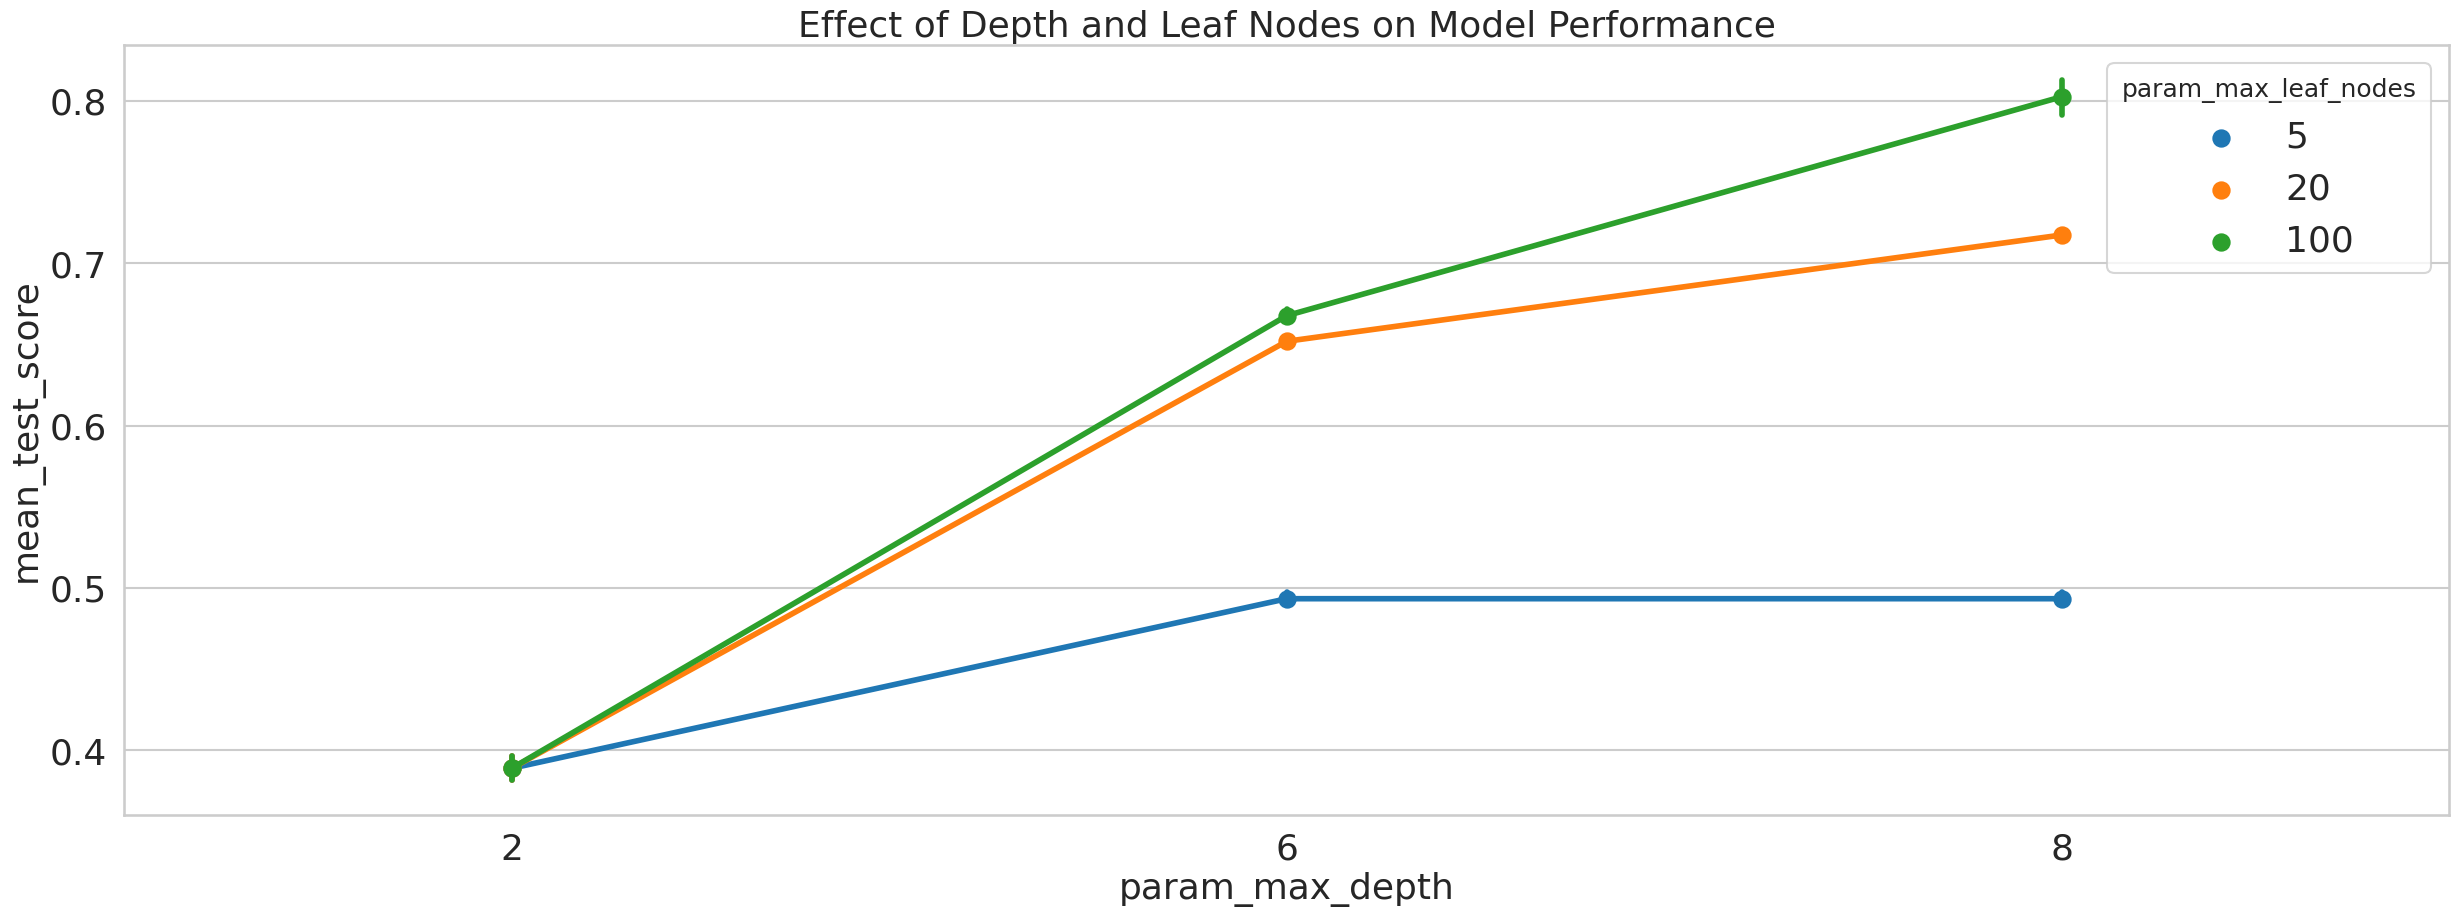

In [12]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))
df = pd.DataFrame(data=grid_cv_dtm.cv_results_)

fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

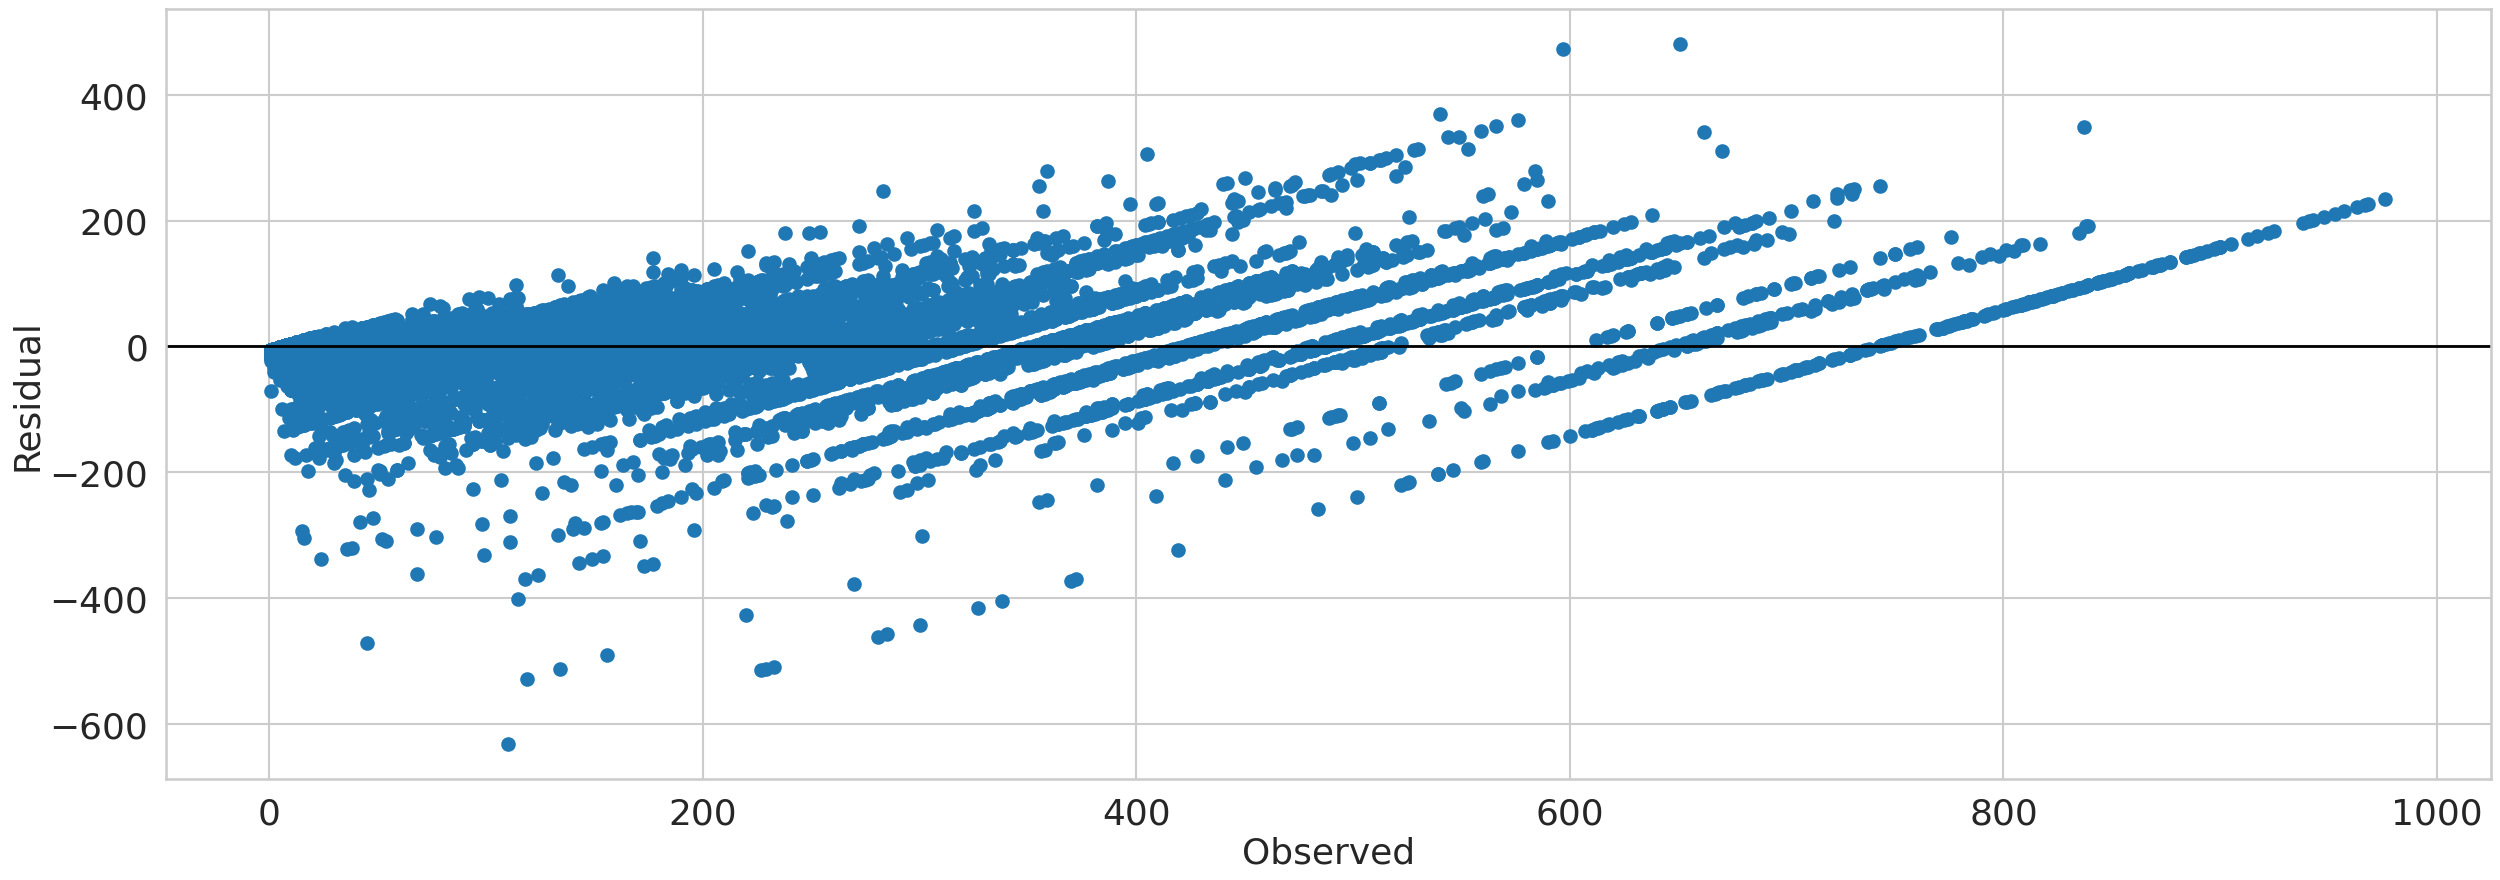

In [13]:
predicted = grid_cv_dtm.best_estimator_.predict(X)
residuals = y.flatten()-predicted

fig, ax = plt.subplots()
ax.scatter(y.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [14]:
r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.836
MSE::-5466.263


In [15]:
best_dtm_model = grid_cv_dtm.best_estimator_

y_pred = best_dtm_model.predict(X_test)
residuals = y_test.flatten() - y_pred


r2_score = best_dtm_model.score(X_test,y_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))

R-squared:0.846
MSE: 4897.24
